In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model_inceptionv1 import InceptionV1
from utils import ImageDataGenerator

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters
train_layers = ["Conv2d_0c_1x1"]
class_dic = {
    0: "bus",
    1: "dinosaurs",
    2: "elephants",
    3: "flowers",
    4: "hourse"
}

# Initialize model
inceptionv1 = InceptionV1(num_classes=5, train_layers=train_layers, model="test")

In [3]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver(var_list=tf.global_variables())
model_file = tf.train.latest_checkpoint("./runs/inceptionv1/1544498902/ckpt/")
saver.restore(sess, model_file)

INFO:tensorflow:Restoring parameters from /data/repository/TT/TT/finetune_models_with_tfslim/runs/inceptionv1/1544498902/ckpt/model-5200


[[4.5289160e-03 5.0378381e-04 9.7753716e-01 3.9588176e-03 1.3471421e-02]]


(-0.5, 499.5, 332.5, -0.5)

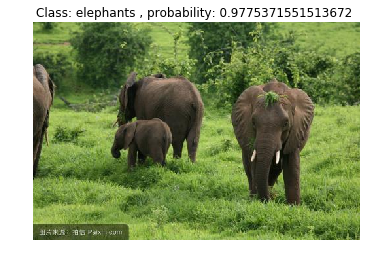

In [12]:
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
img_origin = cv2.imread("./data/test/timg3.jpg")
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
# Convert image to float32 and resize to (224x224)
img = cv2.resize(img_origin.astype(np.float32), (224, 224))
# Subtract the ImageNet mean
img -= imagenet_mean
# Reshape as needed to feed into model
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = img.reshape((1, 224, 224, 3))

probs = sess.run(inceptionv1.probability, feed_dict={inceptionv1.x_input: img,
                                                     inceptionv1.keep_prob: 1.0}
                )

class_name = class_dic[np.argmax(probs)]
print(probs)
plt.imshow(img_origin)
plt.title("Class: {} , probability: {} ".format(class_name, probs[0, np.argmax(probs)]))
plt.axis('off')